# **DL Lab 2**
## **Name: Soumyadeep Ganguly**
## **Reg No: 24MDT0082**


In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv("liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# **Question 1**
## Preprocessing

In [10]:
df.drop('Gender', axis=1, inplace=True)
df

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [11]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
x = MM.fit_transform(df)
x

array([[0.70930233, 0.00402145, 0.        , ..., 0.52173913, 0.24      ,
        1.        ],
       [0.6744186 , 0.14075067, 0.2755102 , ..., 0.5       , 0.176     ,
        1.        ],
       [0.6744186 , 0.0924933 , 0.20408163, ..., 0.52173913, 0.236     ,
        1.        ],
       ...,
       [0.55813953, 0.00536193, 0.00510204, ..., 0.5       , 0.28      ,
        1.        ],
       [0.31395349, 0.01206434, 0.02040816, ..., 0.54347826, 0.28      ,
        1.        ],
       [0.39534884, 0.0080429 , 0.01020408, ..., 0.76086957, 0.48      ,
        0.        ]])

In [12]:
from sklearn.model_selection import train_test_split
X = x[:, 0:9]
Y = x[:, 9]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)


# **Train using LogisticRegression**

In [13]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
print(LR.predict(X_test))


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(LR.predict(X_test), y_test))


0.717948717948718


# **Train using Keras**

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(9,)))
model.summary()


e:\VIT Study Materials\SEM 3\Deep Learning\LAB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
from keras.optimizers import SGD
model.compile(loss='BinaryCrossentropy', optimizer='SGD', metrics= ['accuracy'])
model.fit(X_train, y_train, batch_size=50, epochs = 100, verbose = 1, validation_data= (X_test, y_test))


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6891 - loss: 0.6291 - val_accuracy: 0.6838 - val_loss: 0.6397
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6835 - loss: 0.6367 - val_accuracy: 0.6923 - val_loss: 0.6378
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6715 - loss: 0.6420 - val_accuracy: 0.6923 - val_loss: 0.6362
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6577 - loss: 0.6447 - val_accuracy: 0.7009 - val_loss: 0.6343
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6706 - loss: 0.6287 - val_accuracy: 0.7009 - val_loss: 0.6328
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7018 - loss: 0.6253 - val_accuracy: 0.7009 - val_loss: 0.6316
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6786 - loss: 0.6270 - val_accuracy: 0.7009 - val_loss: 0.6302
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6756 - loss: 0.6337 - val_accuracy: 0.7009 - 

# **Using 2 Layers**

In [18]:
y_train2 = keras.utils.to_categorical(y_train, 2)
y_test2 = keras.utils.to_categorical(y_test, 2)

model2 = Sequential()
model2.add(Dense(2, activation='softmax', input_shape=(9,)))
# model2.add(Dense(1, activation='sigmoid'))
model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 2)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
model2.compile(loss='CategoricalCrossentropy', optimizer='SGD', metrics=['accuracy'])
model2.fit(X_train, y_train2, batch_size=50, epochs=500, verbose=1, validation_data=(X_test, y_test2))

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6911 - loss: 0.6244 - val_accuracy: 0.7094 - val_loss: 0.6193
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7041 - loss: 0.6175 - val_accuracy: 0.7094 - val_loss: 0.6168
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6941 - loss: 0.6240 - val_accuracy: 0.7094 - val_loss: 0.6145
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7067 - loss: 0.6168 - val_accuracy: 0.7094 - val_loss: 0.6124
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6976 - loss: 0.6184 - val_accuracy: 0.7094 - val_loss: 0.6107
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7156 - loss: 0.6093 - val_accuracy: 0.7094 - val_loss: 0.6092
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7394 - loss: 0.5849 - val_accuracy: 0.7094 - val_loss: 0.6080
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6992 - loss: 0.6123 - val_accuracy: 0.7094

In [20]:
y_pred = np.argmax(model2.predict(X_test), axis=1)
y_pred


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [21]:
model3 = Sequential()
model3.add(Dense(10, activation='sigmoid', input_shape=(9,)))
model3.add(Dense(1, activation = 'sigmoid'))
model3.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model3.compile(loss='BinaryCrossentropy', optimizer='SGD', metrics=['accuracy'])
model3.fit(X_train, y_train, batch_size=10, epochs=100,verbose=1, validation_data=(X_test, y_test))


Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7527 - loss: 0.6043 - val_accuracy: 0.7094 - val_loss: 0.6133
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7160 - loss: 0.6061 - val_accuracy: 0.7094 - val_loss: 0.6066
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7048 - loss: 0.6084 - val_accuracy: 0.7094 - val_loss: 0.6038
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7250 - loss: 0.5910 - val_accuracy: 0.7094 - val_loss: 0.6025
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7079 - loss: 0.6030 - val_accuracy: 0.7094 - val_loss: 0.6018
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7035 - loss: 0.6067 - val_accuracy: 0.7094 - val_loss: 0.6015
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7282 - loss: 0.5851 - val_accuracy: 0.7094 - val_loss: 0.6014
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7103 - loss: 0.5994 - val_accuracy: 0.7094 - v

# **Question2: using reLu Activation**

In [23]:
model4 = Sequential()
model4.add(Dense(10, activation='relu', input_shape=(9,)))
model4.add(Dense(1, activation = 'sigmoid'))
model4.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
model4.compile(loss='BinaryCrossentropy', optimizer='SGD', metrics=['accuracy'])
model4.fit(X_train, y_train, batch_size=50, epochs=1000,verbose=1, validation_data=(X_test, y_test))


Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4941 - loss: 0.6944 - val_accuracy: 0.6068 - val_loss: 0.6844
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5855 - loss: 0.6794 - val_accuracy: 0.6667 - val_loss: 0.6728
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7002 - loss: 0.6670 - val_accuracy: 0.6667 - val_loss: 0.6629
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6914 - loss: 0.6580 - val_accuracy: 0.7094 - val_loss: 0.6537
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7302 - loss: 0.6462 - val_accuracy: 0.7094 - val_loss: 0.6455
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7076 - loss: 0.6421 - val_accuracy: 0.7094 - val_loss: 0.6389
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7075 - loss: 0.6383 - val_accuracy: 0.7094 - val_loss: 0.6329
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6920 - loss: 0.6380 - val_accuracy: 

# **Question 3: MNIST**

In [25]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [26]:
batch_size = 128
num_classes = 10
epochs = 10
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step


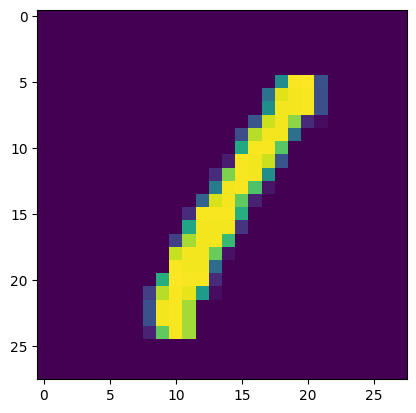

In [27]:
plt.imshow(X_train[3])

In [28]:
print(X_train[3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [40]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


y_train_cat = keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = keras.utils.to_categorical(y_test, num_classes=10)

In [41]:
model5 = Sequential()
model5.add(Dense(784, activation='relu', input_shape=(784,)))
model5.add(Dense(784, activation='relu', input_shape=(784,)))
model5.add(Dense(784, activation='relu', input_shape=(784,)))
model5.add(Dense(10, activation = 'softmax'))
model5.summary()

e:\VIT Study Materials\SEM 3\Deep Learning\LAB\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,854,170 (7.07 MB)

 Trainable params: 1,854,170 (7.07 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model5.compile(loss='CategoricalCrossentropy', optimizer='SGD', metrics=['accuracy'])
model5.fit(X_train, y_train_cat, batch_size=50, epochs=10,verbose=1, validation_data=(X_test, y_test_cat))

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1136 - loss: 2.2976 - val_accuracy: 0.1135 - val_loss: 2.2969
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1137 - loss: 2.2971 - val_accuracy: 0.1135 - val_loss: 2.2963
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1137 - loss: 2.2965 - val_accuracy: 0.1135 - val_loss: 2.2957
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1129 - loss: 2.2957 - val_accuracy: 0.1135 - val_loss: 2.2949
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1126 - loss: 2.2952 - val_accuracy: 0.1135 - val_loss: 2.2940
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1150 - loss: 2.2939 - val_accuracy: 0.1135 - val_loss: 2.2932
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1139 - loss: 2.2932 - val_accuracy: 0.1189 - val_loss: 2.2923
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.1247 - loss: 2.2921 - 

In [45]:
loss, accuracy = model5.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 2.2867
Test Accuracy: 0.1157


In [48]:
predictions = model5.predict(X_test)
for i in range(5):
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(y_test_cat[i])
    print(f"Image {i+1}: Predicted = {predicted_class}, True = {true_class}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Image 1: Predicted = 1, True = 7
Image 2: Predicted = 1, True = 2
Image 3: Predicted = 1, True = 1
Image 4: Predicted = 1, True = 0
Image 5: Predicted = 1, True = 4


# **Question 4**

In [50]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [52]:
# inputs
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

# Output 
y = np.array([[0],
              [1],
              [1],
              [0]])

In [59]:

synapse0 = 2 * np.random.random((3, 4)) - 1
synapse1 = 2 * np.random.random((4, 1)) - 1

print("Initial random weights for synapse0:")
print(synapse0)
print("\nInitial random weights for synapse1:")
print(synapse1)

Initial random weights for synapse0:
[[-0.42444932 -0.73994286 -0.96126608  0.35767107]
 [-0.57674377 -0.46890668 -0.01685368 -0.89327491]
 [ 0.14823521 -0.70654285  0.17861107  0.39951672]]

Initial random weights for synapse1:
[[-0.79533114]
 [-0.17188802]
 [ 0.38880032]
 [-0.17164146]]


In [63]:
epochs = 1000
for j in range(epochs):
    layer_0 = X
    layer_1 = sigmoid(np.dot(layer_0, synapse0))
    layer_2 = sigmoid(np.dot(layer_1, synapse1))
 
    layer_2_error = y - layer_2
    if (j % 10000) == 0:
        print(f"\nError after {j} iterations: {np.mean(np.abs(layer_2_error)):.5f}")

    layer_2_delta = layer_2_error * sigmoid_derivative(layer_2)
    layer_1_error = layer_2_delta.dot(synapse1.T)
    layer_1_delta = layer_1_error * sigmoid_derivative(layer_1)
    
    synapse1 += layer_1.T.dot(layer_2_delta)
    synapse0 += layer_0.T.dot(layer_1_delta)


Error after 0 iterations: 0.03159


In [65]:
print("\nOutput after training:")
print(layer_2)

classified_output = (layer_2 > 0.5).astype(int)
print("\nClassified Output after training (0 or 1):")
print(classified_output)

print("\nFinal weights for synapse0:")
print(synapse0)
print("\nFinal weights for synapse1:")
print(synapse1)

# Test
print("\nTesting with a new situation [1, 0, 0]:")
new_input = np.array([1, 0, 0])
l1 = sigmoid(np.dot(new_input, synapse0))
l2 = sigmoid(np.dot(l1, synapse1))
print("Prediction for [1, 0, 0]:")
print(l2)


Output after training:
[[0.01312246]
 [0.97687284]
 [0.97750513]
 [0.03344716]]

Classified Output after training (0 or 1):
[[0]
 [1]
 [1]
 [0]]

Final weights for synapse0:
[[-6.05865722  0.85080658 -6.58033756  3.16456706]
 [-6.0460626   1.04288708  3.09102454 -6.55490124]
 [ 1.91657777  0.09436428 -0.66498881 -0.77146376]]

Final weights for synapse1:
[[-8.15987505]
 [-4.08772551]
 [ 7.57847555]
 [ 7.46256194]]

Testing with a new situation [1, 0, 0]:
Prediction for [1, 0, 0]:
[0.98644327]
